quick check of relationship between daily air quality and daily deaths due to overdose

just looked at PM 2.5 because it's the most obviously linked to systemic inflammation


tl;dr this was quick n dirty, but I'm not seeing anything I'm super excited about following up on

unsurprising daily air quality and daily OD deaths aren't related, since OD deaths are very complicated


after discussion with a MSW, decided to pivot to looking at relationship between air quality and EMS calls generally

side benefit is that we should definitely see a signal there, since well understood increase in e.g. pulmonary trouble
so start with a signal and dig down into anything behavioral

In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from air_brain.data.get_data import DATA_DIR
from air_brain.util.air import PM25

od_file_name = os.path.join(DATA_DIR, "accidental_overdose.csv")

## accidental overdose

In [2]:
od_df = pd.read_csv(od_file_name)
# going to compare to daily air quality data, so just want dates not date times
od_df.rename(columns={'death_date_and_time': 'date',
                      'incident_zip': 'zipcode',
                     }, inplace=True)
od_df.date = pd.to_datetime(pd.to_datetime(od_df.date).dt.date)
# zipcode data is messy
od_df.zipcode = od_df.zipcode.astype(str).str[:5]
od_df.loc[~od_df.zipcode.str.isdigit(), "zipcode"] = np.nan
od_df.zipcode = od_df.zipcode.astype(float)
od_df

,_id,date,manner_of_death,age,sex,race,case_dispo,combined_od1,combined_od2,combined_od3,combined_od4,combined_od5,combined_od6,combined_od7,combined_od8,combined_od9,combined_od10,zipcode,decedent_zip,case_year
0,9490440,2007-01-19,Accident,52,M,W,MO,Cocaine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33914.0,NaN,2007
1,9490441,2007-04-03,Accident,52,F,W,MO,Cocaine,Methadone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15224.0,NaN,2007
2,9490442,2007-04-14,Accident,42,M,W,MO,Cocaine,Fentanyl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15224.0,NaN,2007
3,9490443,2007-04-25,Accident,21,F,W,MO,Fentanyl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15215.0,NaN,2007
4,9490444,2007-04-08,Accident,31,M,W,MO,Alcohol,Heroin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15236.0,NaN,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7194,9497634,2024-05-21,Accident,37,F,W,MO,Cocaine,Fentanyl,Buprenorphine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15132.0,NaN,2024
7195,9497635,2024-05-09,Accident,55,F,B,MO,Cocaine,Fentanyl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15136.0,NaN,2024
7196,9497636,2023-10-14,Accident,32,F,W,MO,Doxepin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15219.0,NaN,2023
7197,9497637,2023-10-01,Accident,42,M,W,MO,Fentanyl,Xylazine,Buprenorphine,Cocaine,NaN,NaN,NaN,NaN,NaN,NaN,15206.0,NaN,2023


In [3]:
# link zip code to lat lon location
zip_df = pd.read_csv(os.path.join(DATA_DIR, "zip2latlon.csv"))
od_df = od_df.merge(zip_df, on="zipcode", how="left", validate="m:1")
od_df

,_id,date,manner_of_death,age,sex,race,case_dispo,combined_od1,combined_od2,combined_od3,...,combined_od7,combined_od8,combined_od9,combined_od10,zipcode,decedent_zip,case_year,place,latitude,longitude
0,9490440,2007-01-19,Accident,52,M,W,MO,Cocaine,NaN,NaN,...,NaN,NaN,NaN,NaN,33914.0,NaN,2007,NaN,NaN,NaN
1,9490441,2007-04-03,Accident,52,F,W,MO,Cocaine,Methadone,NaN,...,NaN,NaN,NaN,NaN,15224.0,NaN,2007,Pittsburgh,40.4642,-79.9448
2,9490442,2007-04-14,Accident,42,M,W,MO,Cocaine,Fentanyl,NaN,...,NaN,NaN,NaN,NaN,15224.0,NaN,2007,Pittsburgh,40.4642,-79.9448
3,9490443,2007-04-25,Accident,21,F,W,MO,Fentanyl,NaN,NaN,...,NaN,NaN,NaN,NaN,15215.0,NaN,2007,Pittsburgh,40.5048,-79.9138
4,9490444,2007-04-08,Accident,31,M,W,MO,Alcohol,Heroin,NaN,...,NaN,NaN,NaN,NaN,15236.0,NaN,2007,Pittsburgh,40.3351,-79.9832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7194,9497634,2024-05-21,Accident,37,F,W,MO,Cocaine,Fentanyl,Buprenorphine,...,NaN,NaN,NaN,NaN,15132.0,NaN,2024,Mckeesport,40.3478,-79.8642
7195,9497635,2024-05-09,Accident,55,F,B,MO,Cocaine,Fentanyl,NaN,...,NaN,NaN,NaN,NaN,15136.0,NaN,2024,Mc Kees Rocks,40.4717,-80.0876
7196,9497636,2023-10-14,Accident,32,F,W,MO,Doxepin,NaN,NaN,...,NaN,NaN,NaN,NaN,15219.0,NaN,2023,Pittsburgh,40.4423,-79.9830
7197,9497637,2023-10-01,Accident,42,M,W,MO,Fentanyl,Xylazine,Buprenorphine,...,NaN,NaN,NaN,NaN,15206.0,NaN,2023,Pittsburgh,40.4723,-79.9132


In [4]:
# save those without a lat/lon or one outside of Allegheny County
# so can check for differences between have/doesn't have
no_lat_lon = od_df.loc[od_df.latitude.isna() | od_df.longitude.isna()].copy()
print(len(no_lat_lon))
od_df = od_df.loc[od_df.latitude.notna() & od_df.longitude.notna()].copy()
print(len(od_df))

769
6430


In [5]:
# what is the closest PM 2.5 measurement site?
# and how far away is it?
air = PM25()

site_dist = air.closest_site(od_df[['latitude', 'longitude']])
od_df = pd.concat([od_df, site_dist], axis=1)

od_df.head()

,_id,date,manner_of_death,age,sex,race,case_dispo,combined_od1,combined_od2,combined_od3,...,combined_od9,combined_od10,zipcode,decedent_zip,case_year,place,latitude,longitude,closest_site,min_dist
1,9490441,2007-04-03,Accident,52,F,W,MO,Cocaine,Methadone,NaN,...,NaN,NaN,15224.0,NaN,2007,Pittsburgh,40.4642,-79.9448,Lawrenceville,0.843238
2,9490442,2007-04-14,Accident,42,M,W,MO,Cocaine,Fentanyl,NaN,...,NaN,NaN,15224.0,NaN,2007,Pittsburgh,40.4642,-79.9448,Lawrenceville,0.843238
3,9490443,2007-04-25,Accident,21,F,W,MO,Fentanyl,NaN,NaN,...,NaN,NaN,15215.0,NaN,2007,Pittsburgh,40.5048,-79.9138,Lawrenceville,3.675944
4,9490444,2007-04-08,Accident,31,M,W,MO,Alcohol,Heroin,NaN,...,NaN,NaN,15236.0,NaN,2007,Pittsburgh,40.3351,-79.9832,Clairton,5.881327
5,9490445,2007-04-25,Accident,47,M,W,MO,Alcohol,Benzodiazepines,Cocaine,...,NaN,NaN,15221.0,NaN,2007,Pittsburgh,40.4346,-79.8655,Parkway East,0.220556


<Axes: >

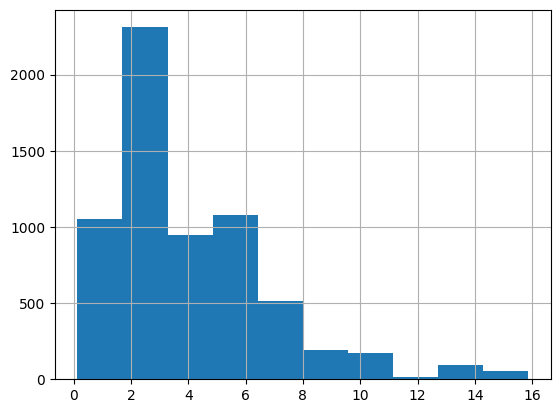

In [9]:
# how far away are we from measurement stations?
od_df.min_dist.hist()

In [7]:
od_daily = od_df.groupby('date').agg({'manner_of_death': 'count'}).reset_index().rename(columns={'manner_of_death': 'n_od'})
od_daily

,date,n_od
0,2007-01-13,1
1,2007-01-14,1
2,2007-01-15,1
3,2007-01-23,1
4,2007-01-24,1
...,...,...
3814,2024-09-04,3
3815,2024-09-14,2
3816,2024-09-15,1
3817,2024-09-30,1


In [8]:
df = od_daily.merge(pm25_daily_avg, on='date', how='outer', validate='m:1')
df = df.loc[df.pm25.notna()]
df = df.loc[df.date <= od_daily.date.max()] # TODO when to cutoff od data, since some cases might be in process?
df.n_od = df.n_od.fillna(0)

df.plot(x='date', y=['n_od', 'pm25'])

NameError: name 'pm25_daily_avg' is not defined

In [ ]:
# zoom in on that spike in 2023
# ... yup, really doesn't look like there's anything there
zoom = df.loc[df.date >= '1/1/2023']
zoom = zoom.set_index('date')

plt.figure()
zoom.pm25.plot()
zoom.n_od.plot(secondary_y=True, style='og')

In [ ]:
df.plot(x='pm25', y='n_od', style='o')

In [ ]:
df.corr()